
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project  

### Executive Summary

* The Linear regression method uses an L1 norm while the Ridge regression method uses an L2 norm. Linear method is more accurate but dosen't have the added stability of an L2 norm. Hence, there was a need to develop a different model that can have the advantage of both L1/L2 norm use. 
* A simple Elastic net model that combines the L1/L2 norm and optimizes to find a more stable solution was formed. The results indicated that a value of $\alpha$ = 47.1486636 and l1_ratio = 0.8208914 helped to minimize the MSE = 2.9633516
with a maximum variance explained of 0.7787862. 

* The results indicated that Elastic net provided a good result combining the L1 norm and L2 norm (ridge regression with MSE= 2.9819413 and variance explained = 0.7773985).

* Elastic net works best in setting where number of predictor features (m) >= number of samples. It is recommended to repeat with a dataset that has more predictor features for poroisty (e.g. Brittleness, VR, etc.) as it can help to increase the accuracy of the model (possibly less MSE/higher variance explained) while maintaing the stability of an L2 norm and combining the L1 norm from LASSO regression.


## Elastic net regression workflow
In the course we used regression models such as the following: Linear regression, Ridge regression, Lasso regression models to analyze the relationship between two predictor features permeability and Acoustic impedance on Porosity (response feature) in an unconventional reservoir setting that consisted of Sand (70%) and Shale (30%). There exist other regression methods to help model the relationship between parameters. In Ridge regression there is use of an L2 Norm while in Lasso method there is an L1 Norm that act as shrinkage parameters to help model the response feature more accurately. Another such method is called Elastic net which linearly combines L1 and L2 norms to find an optimum solution. In Lasso methods if the number of dataset (n) is less than the number of predictor features (m),m>>n,  then it can only select a maximum of n variables (limitation of Lasso). Also, according to [1] it seems that when n>>m then the lasso seems to follow the ridge regression method. There is also an issue of highly correlated variables (e.g. Permeability and acoustic impedance in the workflow that have a correlation of almost -0.8) where Lasso seems to select one variable from a group of correlated variables [2]. The advantage of Lasso, however, is that it can help to select variables while performing the optimization. The Elastic net method seeks to use the advantage of lasso while trying to minimize Lasso disadvantage of arbitrary feature selection when there are highly correlated features. The Elastic method can vary from the square region (LASSO) to the circular region (Ridge regression). 

The elastic net method seeks to minimize the following objective function[3]:
\begin{equation}
Objective = \sum_{i=1}^n (Xw - y)^2_2/(2*nsamples) +(\alpha* \rho * abs(w_1))+ (\alpha* (1-\rho) * abs(w_2^2))/2) 
\end{equation}

 
In Elastic net method there are two parameters to find including alpha (found first which helps specific the contribution of L1/L2 norm on the regularization term) and lambda hyperparameter. For the Elastic net regression model, the following steps are followed (which is the same for other machine learning regression models).
1.	**Instantiation** – An initial realization of the model is formed by adding model hyperparameters.
2.	**Fitting** – The model is trained using training data
3.	**Estimation (interpolation/extrapolation)** – The trained model is used to estimate values at the testing data.
4.	**Model tuning** – The model hyperparameters are tuned by observing changes is MSE/Variance explained in the testing data. In the current case cross-validation is used.

###### The goal of the project is to use Elastic net regression model to predict porosity (Response feature) from Acoustic impedance and Permeability (Predictor features) and to compare the method to Linear/Ridge regression for an unconventional data set by  Dr. Michael Pyrcz called spatial_nonlinear_MV_facies_v3. 

#### Elastic net regression approach
The Elastic net regression method has the following approach:

* Adjusting the $\alpha$ (euqivalent to the $\lambda$ term) and L1_ratio to minimize the error (shrinkage penalty) with the training data.

* It tries to push the slope term to zero by controlling the $\alpha$

Note: the intercept is not affected by lambda.

The $\alpha$ is a hyperparameter that helps to fit the  model to the training data and can be adjusted for the model bias/model variance trade-off

* As $\alpha \rightarrow $ the solution moves towards linear regression the solution approaches linear regression

* as $\alpha$ increases model bias increases and the model variance decreases

* for $\alpha \rightarrow \infty$ the gradient approaches 0 and the function is simply the average

#### Train / Test Split
* In order to help mimic a sparse data set 96% of data is used for testing (260 values), the remaining data 10 values are used for training. Elastic net model is designed to work best in situations (as compared to LASSO/Ridge regression) when the number of features is large and number of samples is small

* Seed value is used with Shuffle turned off (these settings can be used in other workflows to help compare the model)
 
#### More about the current regression model 

* The sparse training was used to optimize the value of $\alpha$ and L1_ratio that minimizes the MSE in training. An iterative approach is used to train the model. 

* The testing phase helps to quantify the accuracy of the Elastic net model. In the current case the following results were found: a value of $\alpha$ = 47.1486636 and l1_ratio = 0.8208914.

* After testing the earlier found hyperparamters using Elastic net method the summary of testing statistics was the following:Average error = -0.07, Standard Deviation error = 5.99, Maximum Variance explained with tuned hyperparameters = 0.7787862 and Minimum MSE with tuned hyperparameters = 2.9633516. The tuned model is more accurate than Linear/Ridge regression.

#### Muneeb Akmal 
#### Petroleum Engineering department, UT-Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences
_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Jack Xiao, Graduate Student, The University of Texas at Austin
##### [Twitter](https://twitter.com/jackxiao6) | [LinkedIn](https://www.linkedin.com/in/yuchen-jack-xiao-b1b20876/)


### Import Packages

In [4]:
import os                                                 # to set current working directory 
import math                                               # basic mathematic calculations 
from sklearn.model_selection import train_test_split      # Data split tool to split as train data and test data
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.metrics import mean_squared_error, r2_score # To calculate the MSE/Variance explained for hyperparameter tuning
import pandas as pd                                       # DataFrames for tabular data
import numpy as np                                        # To help in arrays/matrix math
import matplotlib.pyplot as plt                           # For plotting
import seaborn as sns                                     # To help make (e.g. scatter) density plots
from sklearn.linear_model import LinearRegression       #Linear regression using scikit learn
from sklearn.linear_model import Ridge                      # Ridge regression implemented in scikit learn
from sklearn.linear_model import ElasticNet               #Elastic net implemented in scikit learn
from sklearn.model_selection import cross_val_score         # multi-processor K-fold crossvalidation

### Functions

The following functions will be used in the workflow.It has two preddictor feature inputs (used to plot x/y axis) and it has 1 response faeature input (z/axis plotted as heat color). It helps  to visulaize the model. 

Note: The following code block is *modified* from a code block in Machine learning workflow from Professor Michael Pyrcz (@GeostatsGuy) which can be viewed [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

In [5]:
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels = 50) # plot the predictions
    # add the data values as a colored by response feature scatter plot
    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="white")
    plt.title(title)                                       # add the labels
    plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')      # add the color bar
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return(plt)

#### Setting the working directory

The main directory used in the model (working directory) is set in this place. It allows accessing the data file more easy without the need to retype the full address later.

In [6]:
os.chdir(r"C:\Users\Owner PC\Desktop\PGE383")                                     # set the working directory

### Load Data

The workflow is based on spatial_nonlinear_MV_facies_v3.csv which is an artificial unconventional dataset for the PGE383 class.
The following features are in consideration:
1.	**Porosity** – Percentage of void space in the porous medium (%) – Response feature
2.	**Permeability** – Measure of porous medium ability to allow fluid to pass through (mD) – Predictor feature
3.	**Acoustic impedance (AI)** – measure of rock density * sonic velocity ($kg/m^2s*10^3$) – Predictor feature.
4.	**Facies** – Sand facies (represented by 1.0) and Shale Facies (represented by 0.0).
5. **X and Y coordinates** – Spatial position of the data samples in 2-D

The data is loaded into ‘my_data’ data frame using pandas


In [7]:
my_data = pd.read_csv("spatial_nonlinear_MV_facies_v3.csv")                    # load the comma delimited data file

### Basic Data Checking and Visualization

A matrix scatter plot is used to visualise the dataset.

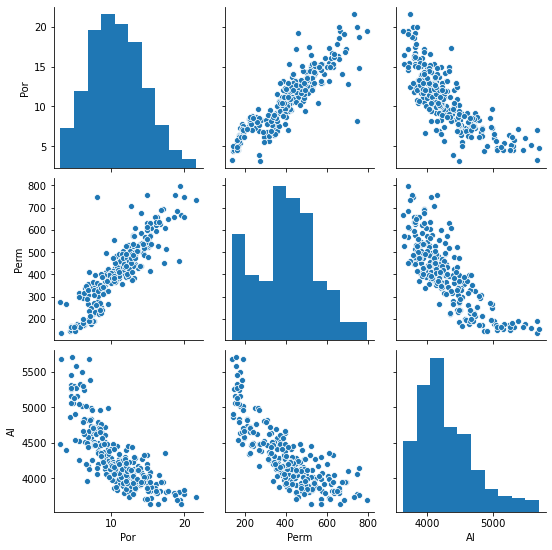

In [8]:
sns.pairplot(my_data,vars=['Por','Perm','AI'],markers='o') # matrix scatter plot

In [9]:
my_data.head()                                            # preview the first 5 rows of the dataframe

,Unnamed: 0,X,Y,Por,Perm,AI,Facies
0,458,150.0,909.0,13.133413,485.231659,3848.226472,1.0
1,228,690.0,9.0,3.235632,138.238177,5673.521586,0.0
2,324,825.0,775.0,9.012557,317.338989,4370.886936,1.0
3,252,530.0,759.0,11.138872,414.252249,4003.754472,1.0
4,318,775.0,75.0,9.233079,350.924567,4134.272337,1.0


Well index are removed as they are not necessary to the analysis

In [10]:
my_data = my_data.iloc[:,1:8]                             # The data is sliced to remove the well-index which is not useful
my_data.describe().transpose()                            # The transpose of the summary statistic of my_data is shown

,count,mean,std,min,25%,50%,75%,max
X,270.0,472.537037,288.917266,0.000000,225.000000,475.000000,745.000000,990.000000
Y,270.0,522.622222,277.643599,9.000000,309.000000,525.000000,769.000000,999.000000
Por,270.0,10.778590,3.665004,3.135247,7.909297,10.557808,13.119702,21.599413
Perm,270.0,406.286106,147.891654,138.238177,309.663433,408.150631,495.549617,798.263353
AI,270.0,4292.475630,433.786043,3630.239427,3981.691959,4192.107297,4491.224552,5701.203128
Facies,270.0,0.785185,0.411456,0.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#this is not necessary with the current data as it seems they are no negative values but can be used if there is a 
#dataset that is not all positive
num = my_data._get_numeric_data()                         # gets numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
my_data.describe().transpose()                            # transpose of summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
X,270.0,472.537037,288.917266,0.000000,225.000000,475.000000,745.000000,990.000000
Y,270.0,522.622222,277.643599,9.000000,309.000000,525.000000,769.000000,999.000000
Por,270.0,10.778590,3.665004,3.135247,7.909297,10.557808,13.119702,21.599413
Perm,270.0,406.286106,147.891654,138.238177,309.663433,408.150631,495.549617,798.263353
AI,270.0,4292.475630,433.786043,3630.239427,3981.691959,4192.107297,4491.224552,5701.203128
Facies,270.0,0.785185,0.411456,0.000000,1.000000,1.000000,1.000000,1.000000


#### Splicing the DataFrame into X and Y dataframes

New data frames X (Perm and AI) and y(Porosity) are made that are shallow copies from the original my_data data frame. This may help decrease errors when working with the data frames.

In [12]:
X = my_data[['Perm','AI']]                         # slice predictor features, permeability and acoustic impedance for all samples
y = my_data[['Por']]                               # slice repsonse features, Porosity all samples

The limits of the variables are set as it may help later when plotting the data to help make it easier. 

In [13]:
Perm_min = 100.0; Perm_max = 1000.0                 # predictor feature 1 Permeability, X1, range           
AI_min = 3500.0; AI_max = 6000.0                    # predictor feature 2 Acoustic impedance, X2, range
Por_min = 0.0; Por_max = 25.0                       # response feature Porosity range
cmap = plt.cm.inferno                               # color map
error_min = -15.0; error_max = 15.0                 # prediction error range
nbin = 40                                           # number of bins in histograms

#### Train and Test Split

The data is split into testing/training using: .train_test_split() function

* Random state is used to select the random seed number or it can be set to None 
* There are 4 outputs which include: X_train, X_test, y_train, y_test
* Shuffle function can be used to randomise the variables or it can be set to False
* Test size = 0.96 (Number of training data = 10) is used to form a sparse dataset
* Random_state (seed number) = 73753 is selected
* Shuffle = True (to help get random data values)

In [49]:
#slicing the data into testing and training data based on earlier settings.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.96, random_state=73753, shuffle = False) # train and test split
n_train = len(X_train)
n_test = len(X_test)                            
print('Number of training ' + str(n_train) + ', number of test ' + str(n_test))
X_train

Number of training 10, number of test 260


,Perm,AI
0,485.231659,3848.226472
1,138.238177,5673.521586
2,317.338989,4370.886936
3,414.252249,4003.754472
4,350.924567,4134.272337
5,317.212403,4255.511437
6,308.165970,4816.235233
7,381.217377,4052.264165
8,522.370218,3834.782940
9,466.876198,4208.805690


#### Plotting the Data For 2 Predictor Features (Permeability and AI) and 1 Response Feature (Porosity)

The training and testing data is plotted on a scatter plot to show the variance in data in 3D heat plot.
Note: The following code block is *modified* from a code from Professor Michael Pyrcz (@GeostatsGuy)

<ipython-input-50-93652192c81d>:2: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(X_train["Perm"],X_train["AI"],s=None, c=y_train["Por"], marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
<ipython-input-50-93652192c81d>:8: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(X_test["Perm"],X_test["AI"],s=None, c=y_test["Por"], marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")


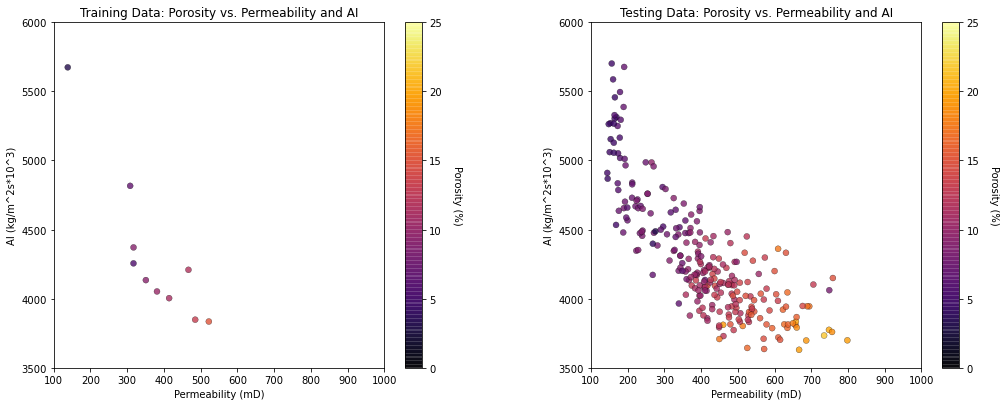

In [50]:
plt.subplot(121)                                          # scatter plot of the training data, 1 row x 2 columns
im = plt.scatter(X_train["Perm"],X_train["AI"],s=None, c=y_train["Por"], marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: Porosity vs. Permeability and AI'); plt.xlabel('Permeability (mD)'); plt.ylabel('AI (kg/m^2s*10^3)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(Perm_min,Perm_max); plt.ylim(AI_min,AI_max)
cbar.set_label("Porosity (%)", rotation=270, labelpad=20)

plt.subplot(122)                                          # scatter plot of the testing data, 1 row x 2 columns
im = plt.scatter(X_test["Perm"],X_test["AI"],s=None, c=y_test["Por"], marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: Porosity vs. Permeability and AI'); plt.xlabel('Permeability (mD)'); plt.ylabel('AI (kg/m^2s*10^3)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(Perm_min,Perm_max); plt.ylim(AI_min,AI_max)
cbar.set_label("Porosity (%)", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Training/Visualizing an Elastic Net regression model

Using scikit-learn functionality an Elastic Net model is made and is visualised on a heat map with Permeability (x-axis) and AI(y-axis) where porosity is represented as the heat color (map color)

A first realization (instantiate the model) is done. Hyperparameter value is selected arbitrailty which can be optimized later. 

* **alpha** is the lambda hyperparameter equivalent and **rho (l1_ratio)** is a measure of the contribution of L1/L2 norm to the calculation where rho is contribution from L1 norm and (1-rho) is contribution from L2 norm. 
* reshape(n,1) is used to convert our only response feature (Porosity) into a 2D ndarray.
Note: The following code block is *modified* from a code block in Machine learning workflow from Professor Michael Pyrcz (@GeostatsGuy) which can be viewed [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

<ipython-input-5-b709a5233a8c>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="white")
<ipython-input-5-b709a5233a8c>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="white")


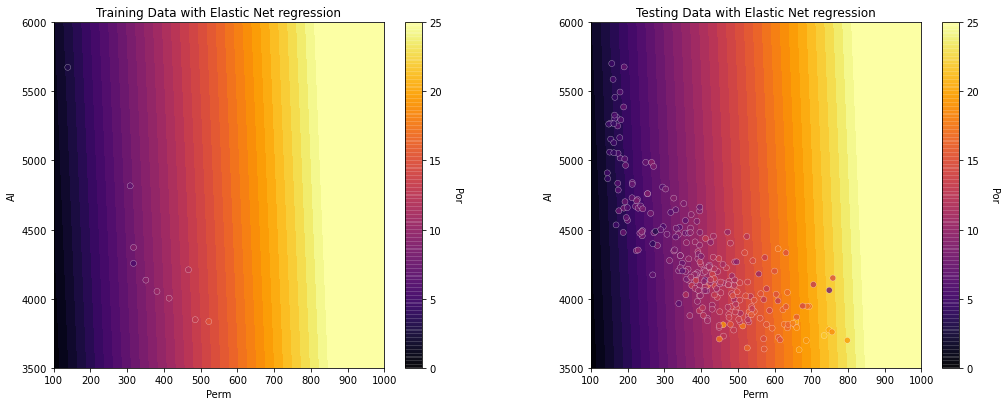

In [51]:
# Step 1: Instantiate the Model (First realization of the model for a naive case)
elasticnet_reg = linear_model.ElasticNet(alpha=1.0,l1_ratio=0.5)

# Step 2: Fit the Data on Training Data 
elasticnet_reg.fit(X_train.values, y_train.values) # fit model

#Step 3: Plotting the model using a scatter plot
plt.subplot(121)
plt = visualize_model(elasticnet_reg,X_train["Perm"],Perm_min,Perm_max,X_train["AI"],AI_min,AI_max, y_train["Por"],Por_min,Por_max,'Training Data with Elastic Net regression')
plt.subplot(122)
plt = visualize_model(elasticnet_reg,X_test["Perm"],Perm_min,Perm_max,X_test["AI"],AI_min,AI_max, y_test["Por"],Por_min,Por_max,'Testing Data with Elastic Net regression')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Predicting using Elastic Net regression at the Training Data 
To help visualize the dataset more, the Elastic net model is used to predict the values at the training dataset. The scikit-learn .predict() function can be used to predict the porosity values at the training data. The difference (residual error) is calculated at each sample using the equation y_train_resid=y_train_pred-y_train which outputs a ndarray of the same size as X_train, y_train. Next, the Mean square error (MSE), which is defined as the L2 norm of error where the inputs include predicted values and truth values as 1-D ndarrays, is calculated also. The output is the following:
1.	Histogram of error in prediction as a percentage of porosity (y_train_resid). This can help to identify any global error bias.
2.	Line scatter plot of porosity truth vs predicted porosity,
3.	Line scatter plot of training prediction error in porosity vs predicted porosity. This is useful for checking if there is a conditional bias

Note: The following code block is *modified* from a code from Professor Michael Pyrcz (@GeostatsGuy) view [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

MSE training: 0.92
Variance explained training: 0.92
Training: Average error = 0.00
Training: Standard Deviation error = 0.96


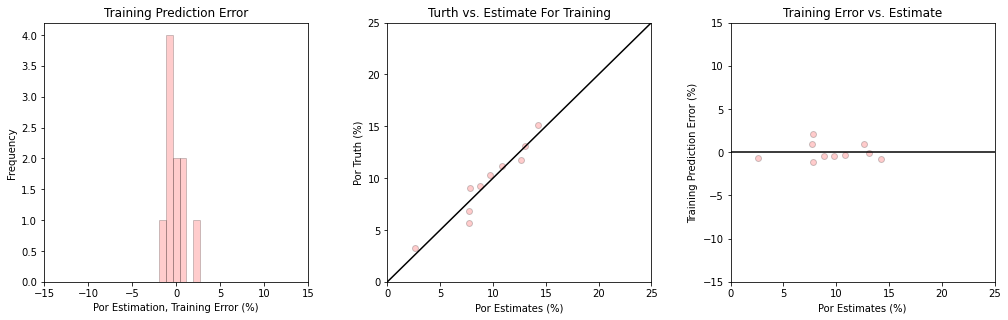

In [52]:
# Step 4: - y_train values are calculated using the elastic net regression
y_train_pred = elasticnet_reg.predict(X_train.values)        # Elastic net is used to predict porosity at training data
y_train_resid = y_train_pred.reshape(n_train,1) - y_train.values     # residual error calculation over the training data
MSE_train = mean_squared_error(y_train, y_train_pred)           # calculate the training MSE      
variance_explained_train = r2_score(y_train, y_train_pred)           # calculate the training MSE      

# Report the goodness of fit
print('MSE training: %.2f' % MSE_train)
print('Variance explained training: %.2f' % variance_explained_train)
print('Training: Average error = %.2f' % np.average(y_train_resid)) # calculate the average testing error 
print('Training: Standard Deviation error = %.2f' % np.std(y_train_resid)) # calculate the standard deviation testing error

plt.subplot(131)                                                # histogram of training error
plt.hist(y_train_resid, alpha = 0.2, color = 'red', edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin))
plt.title('Training Prediction Error'); plt.xlabel('Por Estimation, Training Error (%)'); plt.ylabel('Frequency')
plt.xlim(error_min,error_max)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions 
plt.scatter(y_train_pred,y_train['Por'].values,c='red',alpha=0.2,edgecolor='black')
plt.title('Turth vs. Estimate For Training'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Por Truth (%)')
plt.plot([Por_min,Por_max],[Por_min,Por_max],c='black')
plt.xlim(Por_min,Por_max); plt.ylim(Por_min,Por_max)

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_train_pred,y_train_resid,c='red',alpha=0.2,edgecolor='black')
plt.title('Training Error vs. Estimate'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Training Prediction Error (%)')
plt.plot([Por_min,Por_max],[0,0],c='black')
plt.xlim(Por_min,Por_max); plt.ylim(error_min,error_max)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

#### Predicting using Elastic Net regression at the Testing Data 
Next, using the previously specified parameters (alpha, l1_ratio) the Elastic net method is used to estimate values at the testing data.

MSE testing: 5.11
Variance explained testing: 0.62
Testing: Average error = -0.08
Testing: Standard Deviation error = 2.26


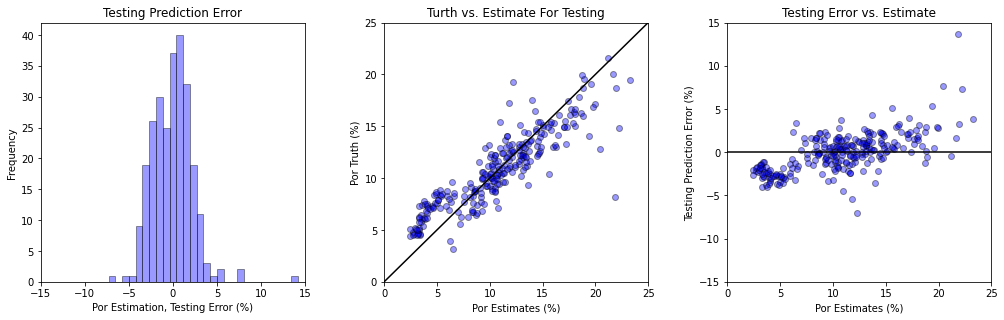

In [53]:
# Step 4: - y_test values are calculated using the elastic net regression
y_test_pred = elasticnet_reg.predict(X_test.values)        # Elastic net is used to predict porosity at testing data
y_test_resid = y_test_pred.reshape(n_test,1) - y_test.values     # residual error calculation over the testing data
MSE_test = mean_squared_error(y_test, y_test_pred)           # calculate the testing MSE      
variance_explained_test = r2_score(y_test, y_test_pred)           # calculate the testing MSE      

# Report the goodness of fit
print('MSE testing: %.2f' % MSE_test)
print('Variance explained testing: %.2f' % variance_explained_test)
print('Testing: Average error = %.2f' % np.average(y_test_resid)) # calculate the average testing error 
print('Testing: Standard Deviation error = %.2f' % np.std(y_test_resid)) # calculate the standard deviation testing error

plt.subplot(131)                                                # histogram of testing error
plt.hist(y_test_resid, alpha = 0.4, color = 'blue', edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin))
plt.title('Testing Prediction Error'); plt.xlabel('Por Estimation, Testing Error (%)'); plt.ylabel('Frequency')
plt.xlim(error_min,error_max)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions 
plt.scatter(y_test_pred,y_test['Por'].values,c='blue',alpha=0.4,edgecolor='black')
plt.title('Turth vs. Estimate For Testing'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Por Truth (%)')
plt.plot([Por_min,Por_max],[Por_min,Por_max],c='black')
plt.xlim(Por_min,Por_max); plt.ylim(Por_min,Por_max)

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_test_pred,y_test_resid,c='blue',alpha=0.4,edgecolor='black')
plt.title('Testing Error vs. Estimate'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Testing Prediction Error (%)')
plt.plot([Por_min,Por_max],[0,0],c='black')
plt.xlim(Por_min,Por_max); plt.ylim(error_min,error_max)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()


#### Combined histogram of the Training and Testing Model for Elastic Net regression

In this section the above two graphs are combined together for better visualization. Note: The following code block is *modified* from a code (Machine learning) from Professor Michael Pyrcz (@GeostatsGuy)

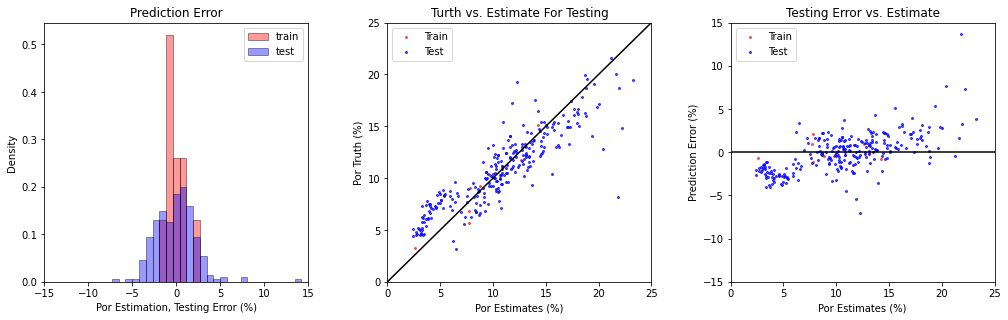

In [54]:
plt.subplot(131)                                                # histogram of training error
plt.hist(y_train_resid, alpha = 0.4, color = 'red', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "train")
plt.hist(y_test_resid, alpha = 0.4, color = 'blue', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "test")
plt.title('Prediction Error'); plt.xlabel('Por Estimation, Testing Error (%)'); plt.ylabel('Density')
plt.legend()
plt.xlim(error_min,error_max)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions
plt.scatter(y_train_pred,y_train['Por'].values,c='red',s = 4, marker = 'x', alpha=0.7,label="Train")
plt.scatter(y_test_pred,y_test['Por'].values,c='blue',s = 4, marker = 'o', alpha=0.7,label="Test")
plt.plot([Por_min,Por_max],[Por_min,Por_max],c='black')
plt.title('Turth vs. Estimate For Testing'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Por Truth (%)')
plt.xlim(Por_min,Por_max); plt.ylim(Por_min,Por_max)
plt.legend()

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_train_pred,y_train_resid,c='red',s=4,marker='x',alpha=0.7,label="Train")
plt.scatter(y_test_pred,y_test_resid,c='blue',s=4,marker='o',alpha=0.7,label="Test")
plt.title('Testing Error vs. Estimate'); plt.xlabel('Por Estimates (%)'); plt.ylabel('Prediction Error (%)')
plt.plot([Por_min,Por_max],[0,0],c='black')
plt.xlim(Por_min,Por_max); plt.ylim(-15,15)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

### Hyperparameter Tuning by using a nested loop for Elastic net method

The Elastic net method has two hyperparameters to tune: alpha and l1_ratio.
* Inorder to help identify the ideal set of hyperparameter values for the loss funtion a set of values for each hyperparameter is formed using a for loop. In the current case 50 values are used for each hyperparameter (where the combination is 2500)
* Alpha values help quantify the overall contribution of the loss term while l1_ratio is the amount of L1 norm is the elatic net model (amount of L2 norm = 1-l1_ratio) 
* The value of MSE and Variance explained is calculated for each combination and stored in an array
* The minimum value of MSE at a particular data index is found using the argmin operator
* The tuned value of hyperparameters is used to calculate the value of statistics (variance explained, mse, standard deviation, average error) at testing and training data
* Scatter plots are plotted of Variance explained (z, heat axis) vs X (alpha) and Y (l1_ratio) axis at Testing/Training data. A log scale is used for alpha values as they cover a large range.
* Loop part is modified from a leaf_node optimization by Dr. Michael Pyrcz which can be seen [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

In [55]:
range_alpha = 50 #total number of alpha values
range_l1_ratio=50 #total number of l1_ratio values
ncases=range_alpha*range_l1_ratio #number of cases
alpha_mat = np.logspace(-6,2,range_alpha) #range of values from alpha hyperparameter
l1_ratio_mat=np.logspace(-0.2,0,range_l1_ratio) #l1 ratio here varies from around 0.6 to 1 (a higher number was recommended in literature closer to L1norm)
density_model = np.linspace(0,25,5)
var_explained_train = np.zeros(ncases); var_explained_test = np.zeros(ncases)#initialising ndarrays
mse_train = np.zeros(ncases); mse_test = np.zeros(ncases) #initiallising nd arrays
step=0 #used in the loop below to identify location of mse,variance explained in the arrays (if using ilam,iratio it simply replaces values and does not move to next index)
for ialpha in range(0,len(alpha_mat)):      # Loop over all alpha values
    for iratio in range (0,len(l1_ratio_mat)): #Loop over all l1_ratio values
        
        elasticnet_reg = linear_model.ElasticNet(alpha=alpha_mat[ialpha],l1_ratio=l1_ratio_mat[iratio])
        elasticnet_reg.fit(X_train.values, y_train['Por'].values) # fit model using elastic net
    
        porosity_pred_train = elasticnet_reg.predict(X_train.values) # predict with the fit model at training data  
        var_explained_train[step] = r2_score(y_train["Por"].values, porosity_pred_train)#calculating variance explained at training data
        mse_train[step] = mean_squared_error(y_train["Por"].values, porosity_pred_train)#calculating mean squrae error at training data 
    
        porosity_pred_test = elasticnet_reg.predict(X_test.values)# predicting with the fit model at testing data 
        var_explained_test[step] = r2_score(y_test["Por"].values, porosity_pred_test)#calculating variance explained at testing data
        mse_test[step] = mean_squared_error(y_test['Por'].values, porosity_pred_test)#calculating mean squrae error at testing data   
        step=step+1

#reshaping the ndarrays into the following size:ncases*1        
var_explained_train.reshape(step,1) 
mse_train.reshape(step,1)
var_explained_test.reshape(step,1)
mse_test.reshape(step,1)
#Adding alpha values to create a set of values for alpha     
alpha_column = np.zeros(ncases);
l1_ratio_column = np.zeros(ncases);
alpha_step=0
for i in range(0,len(alpha_mat)):      # Loop over all alpha values
    for j in range (0,len(l1_ratio_mat)): #loop over all l1_ration values
        alpha_column[alpha_step]=alpha_mat[i]
        alpha_step=alpha_step+1
        
alpha_column.reshape(step,1)#reshape into 1d array

imin = np.argmin(mse_test) # This returns the index of the ndarray with the smallest mse
tuned_alpha_node = (alpha_column[imin])#value of alpha at the lowest MSE
#Adding l1_ratio values to create a set of values for alpha     
l1_ratio_step=0
for i in range(0,len(alpha_mat)):      # Loop over all alpha values
    for j in range (0,len(l1_ratio_mat)):
        l1_ratio_column[l1_ratio_step]=l1_ratio_mat[j]#need to use j matrix as it needs to vary for every value for a particular alpha value
        l1_ratio_step=l1_ratio_step+1
        
l1_ratio_column.reshape(step,1)
l1_ratio_mat

tuned_l1_ratio_node = (l1_ratio_column[imin])#value of tuned_l1_ratio at the lowest MSE                                      
#Hparameters stores the set of all alpha/l1_ratio values in a ncases*2 Dataframe
hparameters = pd.DataFrame({'alpha_column': list(alpha_column), 'l1_ratio_column': list(l1_ratio_column)}, columns=['alpha_column', 'l1_ratio_column'])
hparameters#this can be used to viualise the dataframe with X,Y hyperparameters that estimate Z1(MSE) and Z2(Variance explained) at test/train data
#Testing statistics are also converted to a Dataframe; the column number of each dataset (particular alpha/l1_ratio value matches with the respective test statistic)
var_explained_train_df= pd.DataFrame({'var_explained_train': list(var_explained_train)}, columns=['var_explained_train'])
mse_train_df= pd.DataFrame({'mse_train': list(mse_train)}, columns=['mse_train'])
var_explained_test_df= pd.DataFrame({'var_explained_test': list(var_explained_test)}, columns=['var_explained_test'])
mse_test_df= pd.DataFrame({'mse_test': list(mse_test)}, columns=['mse_test'])

* The values of the hyperparameters are found at the testing data

In [56]:
print('Testing: The tuned value of **alpha parameter** = %.7f' % tuned_alpha_node)
print('Testing: The tuned value of **l1_ratio parameter** = %.7f' % tuned_l1_ratio_node)

Testing: The tuned value of **alpha parameter** = 47.1486636
Testing: The tuned value of **l1_ratio parameter** = 0.8208914


* The tuned hyperparameter values are used to calculate the average error/standard deviation of error. Minimum MSE and maximum variance explained at testing/training data is also mentioned.

In [57]:
#Using the tuned values of hyperparamter 
alpha_tunemodel=0.0056899
l1_ratio_tunemodel=0.8685114
elasticnet_reg = linear_model.ElasticNet(alpha=alpha_tunemodel,l1_ratio=l1_ratio_tunemodel)
elasticnet_reg.fit(X_train.values, y_train['Por'].values) # fit model using elastic net
porosity_pred_train = elasticnet_reg.predict(X_train.values) # predict with the new tuned model at training data  
porosity_pred_test = elasticnet_reg.predict(X_test.values)# predicting with the new tuned model at testing data 

y_train_resid = porosity_pred_train - y_train.values  #residual values are calculated at training data
y_test_resid = porosity_pred_test - y_test.values  #residual values are calculated at testing data
#Test statistics for the optimized case
print('Testing: Minimum MSE with tuned hyperparameters = %.7f' % mse_test[imin])
print('Training: Average error = %.2f' % np.average(y_train_resid)) 
print('Training: Standard Deviation error = %.2f' % np.std(y_train_resid)) 
print('Training: Maximum Variance explained with tuned hyperparameters = %.7f' % var_explained_train[imin])
print('Training: Minimum MSE with tuned hyperparameters = %.7f' % mse_train[imin])
print('Testing: Average error = %.2f' % np.average(y_test_resid)) 
print('Testing: Standard Deviation error = %.2f' % np.std(y_test_resid)) 
print('Testing: Maximum Variance explained with tuned hyperparameters = %.7f' % var_explained_test[imin])
print('Testing: Minimum MSE with tuned hyperparameters = %.7f' % mse_test[imin])

Testing: Minimum MSE with tuned hyperparameters = 2.9633516
Training: Average error = 0.00
Training: Standard Deviation error = 4.68
Training: Maximum Variance explained with tuned hyperparameters = 0.8790898
Training: Minimum MSE with tuned hyperparameters = 1.3806611
Testing: Average error = -0.07
Testing: Standard Deviation error = 5.99
Testing: Maximum Variance explained with tuned hyperparameters = 0.7787862
Testing: Minimum MSE with tuned hyperparameters = 2.9633516


* Setting the limits of the plot for the training data

In [96]:
#Set of values for training data
var_explained_min = 0.88; var_explained_max = 0.93# response feature 1         
mse_min = 0; mse_max = 3                   # response feature 2
alpha_min = 3e-3; alpha_max = 1e2 
l1_ratio_min=0.62;l1_ratio_max=1.0

* Scatter plot for the value of Variance explained/MSE across the hyperparameter range at training data

<ipython-input-97-6563649530ff>:2: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=var_explained_train_df["var_explained_train"], marker=None, cmap=cmap, norm=None, vmin=var_explained_min, vmax=var_explained_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
<ipython-input-97-6563649530ff>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=mse_train_df["mse_train"], marker=None, cmap=cmap, norm=None, vmin=mse_min, vmax=mse_max, alpha=0.8, l

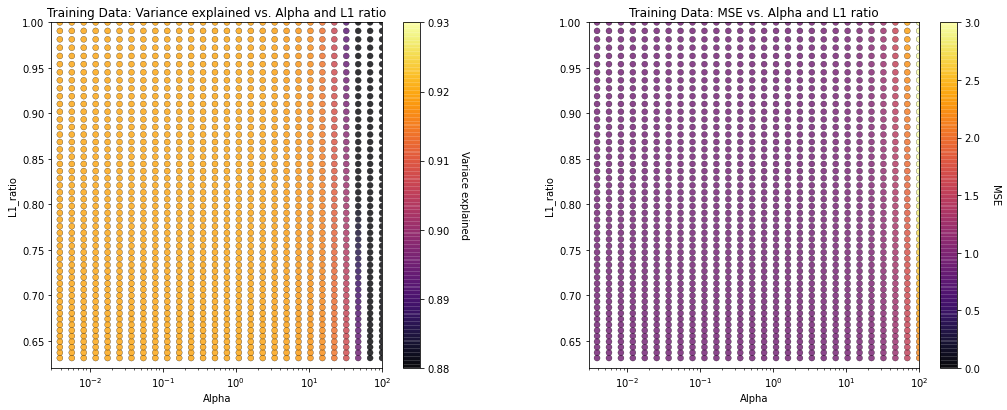

In [97]:
plt.subplot(121)                                          # scatter plot of the training data versus hyperparameter values
im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=var_explained_train_df["var_explained_train"], marker=None, cmap=cmap, norm=None, vmin=var_explained_min, vmax=var_explained_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: Variance explained vs. Alpha and L1 ratio'); plt.xlabel('Alpha'); plt.ylabel('L1_ratio')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(alpha_min,alpha_max); plt.ylim(l1_ratio_min,l1_ratio_max)
cbar.set_label("Variace explained", rotation=270, labelpad=20)
plt.xscale("log")
plt.clim(var_explained_min,var_explained_max)

plt.subplot(122)                                          #scatter plot of the training data versus hyperparameter values
im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=mse_train_df["mse_train"], marker=None, cmap=cmap, norm=None, vmin=mse_min, vmax=mse_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: MSE vs. Alpha and L1 ratio'); plt.xlabel('Alpha'); plt.ylabel('L1_ratio')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(alpha_min,alpha_max); plt.ylim(l1_ratio_min,l1_ratio_max)
cbar.set_label("MSE", rotation=270, labelpad=20)
plt.xscale("log")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

* Setting the limits of the plot for the testing data

In [60]:
#Set of values for training data
var_explained_min_test = 0.75; var_explained_max_test = 0.76                 # response feature 1         
mse_min_test = 3; mse_max_test = 3.7                   # response feature 2
alpha_min_test = 3e-3; alpha_max_test = 1e2 
l1_ratio_min_test=0.62;l1_ratio_max_test=1.0

* Scatter plot for the value of Variance explained/MSE across the hyperparameter range at testing data

<ipython-input-61-776e9eed0199>:2: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=var_explained_test_df["var_explained_test"], marker=None, cmap=cmap, norm=None, vmin=var_explained_min_test, vmax=var_explained_max_test, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
<ipython-input-61-776e9eed0199>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=mse_test_df["mse_test"], marker=None, cmap=cmap, norm=None, vmin=mse_min_test, vmax=mse_max_te

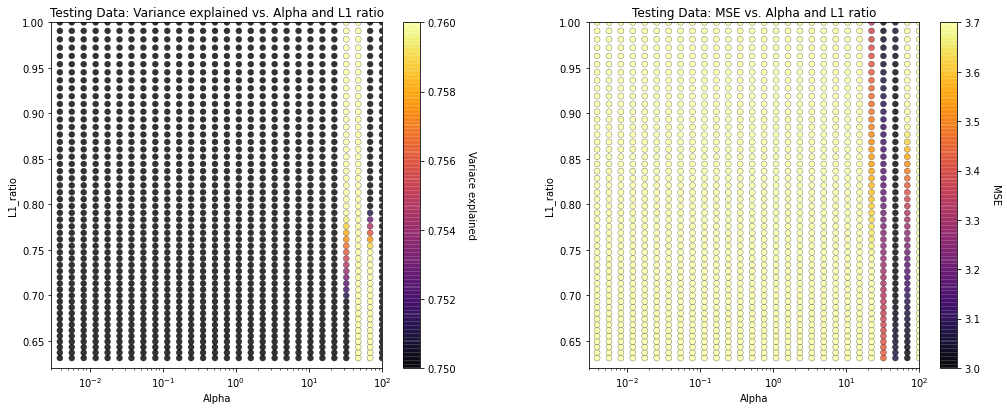

In [61]:
plt.subplot(121)                                          # scatter plot of the training data, 1 row x 2 columns
im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=var_explained_test_df["var_explained_test"], marker=None, cmap=cmap, norm=None, vmin=var_explained_min_test, vmax=var_explained_max_test, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: Variance explained vs. Alpha and L1 ratio'); plt.xlabel('Alpha'); plt.ylabel('L1_ratio')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(alpha_min_test,alpha_max_test); plt.ylim(l1_ratio_min_test,l1_ratio_max_test)
cbar.set_label("Variace explained", rotation=270, labelpad=20)
plt.xscale("log")
plt.clim(var_explained_min_test,var_explained_max_test)

plt.subplot(122)                                          # scatter plot of the training data, 1 row x 2 columns
im = plt.scatter(hparameters["alpha_column"],hparameters["l1_ratio_column"],s=None, c=mse_test_df["mse_test"], marker=None, cmap=cmap, norm=None, vmin=mse_min_test, vmax=mse_max_test, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: MSE vs. Alpha and L1 ratio'); plt.xlabel('Alpha'); plt.ylabel('L1_ratio')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(alpha_min_test,alpha_max_test); plt.ylim(l1_ratio_min_test,l1_ratio_max_test)
cbar.set_label("MSE", rotation=270, labelpad=20)
plt.xscale("log")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Visualizing the Tuned Model
* Plotting the graph the scatter plot for the tuned value of Elastic net hyperparameters

<ipython-input-62-f12a5f830189>:2: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(X_train["Perm"],X_train["AI"],s=None, c=porosity_pred_train, marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
<ipython-input-62-f12a5f830189>:8: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(X_test["Perm"],X_test["AI"],s=None, c=porosity_pred_test, marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")


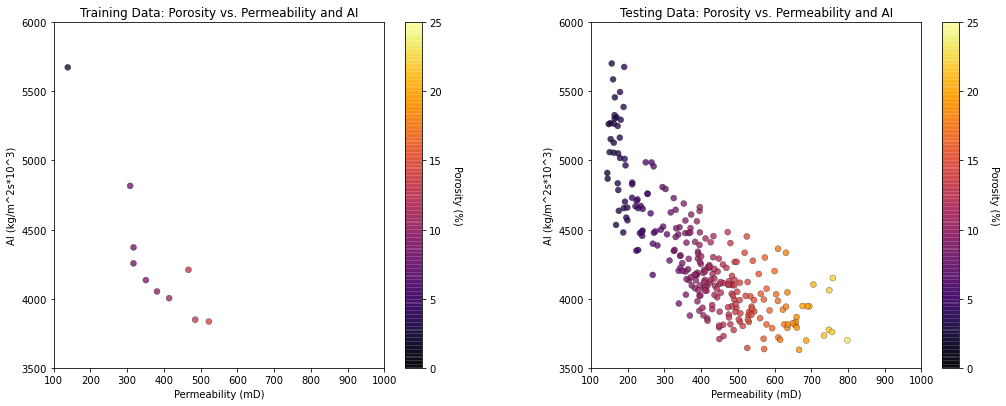

In [62]:
plt.subplot(121)                                          # scatter plot of the training data, 1 row x 2 columns
im = plt.scatter(X_train["Perm"],X_train["AI"],s=None, c=porosity_pred_train, marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: Porosity vs. Permeability and AI'); plt.xlabel('Permeability (mD)'); plt.ylabel('AI (kg/m^2s*10^3)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(Perm_min,Perm_max); plt.ylim(AI_min,AI_max)
cbar.set_label("Porosity (%)", rotation=270, labelpad=20)

plt.subplot(122)                                          # scatter plot of the testing data, 1 row x 2 columns
im = plt.scatter(X_test["Perm"],X_test["AI"],s=None, c=porosity_pred_test, marker=None, cmap=cmap, norm=None, vmin=Por_min, vmax=Por_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: Porosity vs. Permeability and AI'); plt.xlabel('Permeability (mD)'); plt.ylabel('AI (kg/m^2s*10^3)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(Perm_min,Perm_max); plt.ylim(AI_min,AI_max)
cbar.set_label("Porosity (%)", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

### Making a similar model using linear/ridge regression
* The same training/testing data is used to make a linear/ridge model. The 3 models are then compared for accuracy in the current scenerio.  

#### Linear regression model. 
* The linear_model functionalty of scikit learn is used to make a linear model for the training/testing data used earlier. 
* Note: The following code block is *modified* from a code (Machine learning) from Professor Michael Pyrcz (@GeostatsGuy) which can be viewed [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

In [101]:
#Linear regression model
from sklearn import linear_model
# Step 1. Instantiate the Model 
linear_reg = linear_model.LinearRegression()

# Step 2: Fit the Data on Training Data
linear_reg.fit(X_train.values, y_train.values) # fit model

# Step 3: - Make predictions using the training dataset
y_train_pred_linear = linear_reg.predict(X_train.values)        # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_train_linear = mean_squared_error(y_train, y_train_pred)           # calculate the training MSE      
print('Training MSE : %.2f' % MSE_train_linear)

y_train_resid_linear = y_train_pred_linear - y_train.values     # calculate the residuals over the training data

print('Training: Average error = %.2f' % np.average(y_train_resid_linear)) # calculate the average testing error 
print('Training: Standard Deviation error = %.2f' % np.std(y_train_resid_linear)) # calculate the standard deviation testing error

# Step 4: - Make predictions using the testing dataset
y_test_pred_linear = linear_reg.predict(X_test.values)          # predict with the trained model at the training data samples 


var_explained_train_linear = r2_score (y_train, y_train_pred_linear)
print('Training: Variance explained = %.2f' % var_explained_train_linear)

# Report the goodness of fit
MSE_test_linear = mean_squared_error(y_test, y_test_pred)              # calculate the testing MSE      
print('Testing: MSE = %.2f' % MSE_test_linear)

y_test_resid_linear = y_test_pred_linear - y_test.values        # calculate the residuals over the testing data

print('Testing: Average error = %.2f' % np.average(y_test_resid_linear)) # calculate the average testing error 
print('Testing: Standard Deviation error = %.2f' % np.std(y_test_resid_linear)) # calculate the standard deviation testing error

var_explained_test_linear = r2_score (y_test, y_test_pred_linear) 
print('Testing: Variance explained = %.2f' % var_explained_test_linear)

Training MSE : 0.92
Training: Average error = 0.00
Training: Standard Deviation error = 0.96
Training: Variance explained = 0.92
Testing: MSE = 5.11
Testing: Average error = -0.07
Testing: Standard Deviation error = 2.28
Testing: Variance explained = 0.61


#### Ridge regression model. 
* The Ridge functionalty of scikit learn is used to make a ridge regression model for the training/testing data used earlier. 
* Note: The following code block is *modified* from a code (Machine learning) from Professor Michael Pyrcz (@GeostatsGuy) which can be viewed [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)
* Initally the value at lam=0 is calculated to instantiate the model

In [102]:
lam = 0                                         
# Step 1. Instantiate the Model 
ridge_reg = Ridge(alpha=lam)

# Step 2: Fit the Data on Training Data
ridge_reg.fit(X_train,y_train) # fit model

# Step 3: - Make predictions using the testing dataset
y_train_pred_ridge = ridge_reg.predict(X_train.values)

# Report the goodness of fit
MSE_train_ridge = mean_squared_error(y_train, y_train_pred_ridge) 
var_explained_train_ridge = r2_score (y_train, y_train_pred_ridge)
y_train_resid_ridge = y_train_pred_ridge - y_train.values  

# calculate the training data statistics      
print('Training: MSE = %.2f' % MSE_train_ridge)
print('Training: Variance explained = %.2f' % var_explained_train_ridge)
print('Training: Average error = %.2f' % np.average(y_train_resid_ridge)) # calculate the average testing error 
print('Training: Standard Deviation error = %.2f' % np.std(y_train_resid_ridge)) # calculate the standard deviation testing error

# Step 4: - Make predictions using the testing dataset
y_test_pred_ridge = ridge_reg.predict(X_test.values)          # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)  
var_explained_test_ridge = r2_score (y_test, y_test_pred_ridge) 
y_test_resid_ridge = y_test_pred_ridge - y_test.values      

# calculate the testing statistics      
print('Testing: MSE  = %.2f' % MSE_test_ridge)
print('Testing: Variance explained = %.2f' % var_explained_test_ridge)
print('Testing: Average error = %.2f' % np.average(y_test_resid_ridge)) # calculate the average testing error 
print('Testing: Standard Deviation error = %.2f' % np.std(y_test_resid_ridge)) # calculate the standard deviation testing error


Training: MSE = 0.92
Training: Variance explained = 0.92
Training: Average error = 0.00
Training: Standard Deviation error = 0.96
Testing: MSE  = 5.19
Testing: Variance explained = 0.61
Testing: Average error = -0.07
Testing: Standard Deviation error = 2.28


* The hyperparameter values are looped across that minimizes the loss functions (has the lowest MSE). The code is modified from a tree_node optimization by Dr. Michael Pyrcz which can be seen [here](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb)

In [103]:
ncases = 1000
lamd_mat_ridge = np.logspace(-5,9,ncases)
density_model_ridge = np.linspace(0,25,5)
var_explained_train_ridge = np.zeros(ncases); var_explained_test_ridge = np.zeros(ncases)
mse_train_ridge = np.zeros(ncases); mse_test_ridge = np.zeros(ncases)

for ilam in range(0,len(lamd_mat_ridge)):                         # Loop over all lambda values
    ridge_reg = Ridge(alpha=lamd_mat_ridge[ilam])
    ridge_reg.fit(X_train.values, y_train['Por'].values) # fit model
    
    porosity_pred_train_ridge = ridge_reg.predict(X_train.values) # predict with the fit model   
    var_explained_train_ridge[ilam] = r2_score(y_train["Por"].values, porosity_pred_train_ridge)
    mse_train_ridge[ilam] = mean_squared_error(y_train["Por"].values, porosity_pred_train_ridge) 
    
    porosity_pred_test_ridge = ridge_reg.predict(X_test.values)
    var_explained_test_ridge[ilam] = r2_score(y_test["Por"].values, porosity_pred_test_ridge)
    mse_test_ridge[ilam] = mean_squared_error(y_test['Por'].values, porosity_pred_test_ridge)          

* The hyperparameter values that minimizes the MSE is then calculated for ridge regression. 

Minimum MSE with hyperparameter lamda nodes = 17752
Maximum Variance explained with hyperparameter lamda nodes = 17752


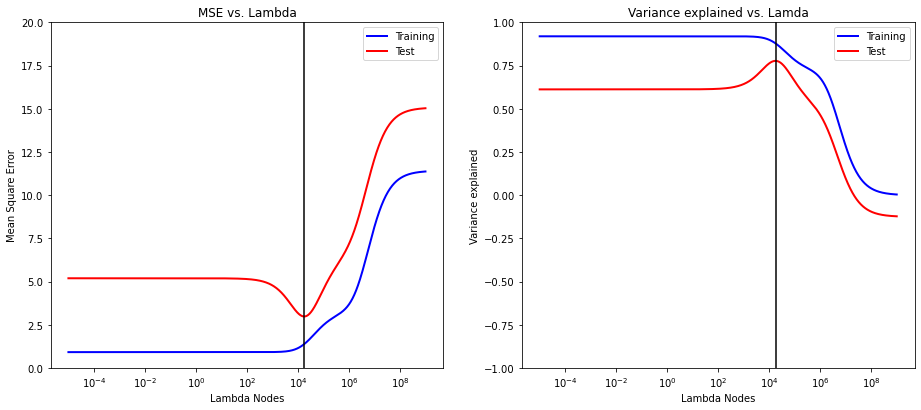

In [104]:
imin = np.argmin(mse_test_ridge)                                      # find the ndarray index with the minimum testing error
tuned_lamda_node_ridge = int(lamd_mat[imin])                         # get the hyperparameter value with the minimum testing error
print('Minimum MSE with hyperparameter lamda nodes = %.0f' % tuned_lamda_node_ridge)

plt.subplot(121)                                                # plot the error in training and testing vs. the hyperparameter
plt.plot(lamd_mat_ridge, mse_train_ridge,  color='blue', linewidth = 2, label = 'Training') # error in training
plt.plot(lamd_mat_ridge, mse_test_ridge,  color='red', linewidth = 2, label = 'Test') # error in testing
plt.plot([tuned_lamda_node_ridge,tuned_lamda_node_ridge],[0,20],color='black') # vertical line at hyperparameter value that minimizes testing error 
plt.title('MSE vs. Lambda'); plt.xlabel('Lambda Nodes'); plt.ylabel('Mean Square Error') # label the plot
plt.ylim(0,20); plt.xscale("log")
plt.legend()       # add a legend

imin2 = np.argmin(var_explained_test_ridge)                                      # find the ndarray index with the minimum testing error
tuned_lamda_node2_ridge = int(lamd_mat_ridge[imin2])                         # get the hyperparameter value with the minimum testing error
print('Maximum Variance explained with hyperparameter lamda nodes = %.0f' % tuned_lamda_node_ridge)

plt.subplot(122)                                                # plot the error in training and testing vs. the hyperparameter
plt.plot(lamd_mat_ridge, var_explained_train_ridge,  color='blue', linewidth = 2, label = 'Training') # error in training
plt.plot(lamd_mat_ridge, var_explained_test_ridge,  color='red', linewidth = 2, label = 'Test') # error in testing
plt.plot([tuned_lamda_node_ridge,tuned_lamda_node_ridge],[-1,2],color='black') # vertical line at hyperparameter value that minimizes testing error 
plt.title('Variance explained vs. Lamda'); plt.xlabel('Lambda Nodes'); plt.ylabel('Variance explained') # label the plot
plt.ylim(-1,1); plt.xscale("log")
plt.legend()    

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

In [105]:
lam = 17752                                         
# Step 1. Instantiate the Model 
ridge_reg = Ridge(alpha=lam)

# Step 2: Fit the Data on Training Data
ridge_reg.fit(X_train,y_train) # fit model

# Step 3: - Make predictions using the testing dataset
y_train_pred_ridge = ridge_reg.predict(X_train.values)

# Report the goodness of fit
MSE_train_ridge = mean_squared_error(y_train, y_train_pred_ridge) 
var_explained_train_ridge = r2_score (y_train, y_train_pred_ridge)
y_train_resid_ridge = y_train_pred_ridge - y_train.values  

# calculate the training data statistics      
print('Training: MSE = %.7f' % MSE_train_ridge)
print('Training: Variance explained = %.7f' % var_explained_train_ridge)
print('Training: Average error = %.7f' % np.average(y_train_resid_ridge)) # calculate the average testing error 
print('Training: Standard Deviation error = %.7f' % np.std(y_train_resid_ridge)) # calculate the standard deviation testing error

# Step 4: - Make predictions using the testing dataset
y_test_pred_ridge = ridge_reg.predict(X_test.values)          # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)  
var_explained_test_ridge = r2_score (y_test, y_test_pred_ridge) 
y_test_resid_ridge = y_test_pred_ridge - y_test.values      

# calculate the testing statistics      
print('Testing: MSE  = %.7f' % MSE_test_ridge)
print('Testing: Variance explained = %.7f' % var_explained_test_ridge)
print('Testing: Average error = %.7f' % np.average(y_test_resid_ridge)) # calculate the average testing error 
print('Testing: Standard Deviation error = %.7f' % np.std(y_test_resid_ridge)) # calculate the standard deviation testing error


Training: MSE = 1.3883873
Training: Variance explained = 0.8784131
Training: Average error = 0.0000000
Training: Standard Deviation error = 1.1782985
Testing: MSE  = 2.9819413
Testing: Variance explained = 0.7773985
Testing: Average error = -0.5403563
Testing: Standard Deviation error = 1.6401087


* Comparison of the three methods using the heat map function.

<ipython-input-5-b709a5233a8c>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="white")
<ipython-input-5-b709a5233a8c>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated since Matplotlib 3.2 and will be removed two minor releases later.  If any parameter follows 'verts', they should be pass as keyword, not positionally.
  im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="white")
<ipython-input-5-b709a5233a8c>:10: MatplotlibDeprecationWarning: The 'verts' parameter of scatter() is deprecated sinc

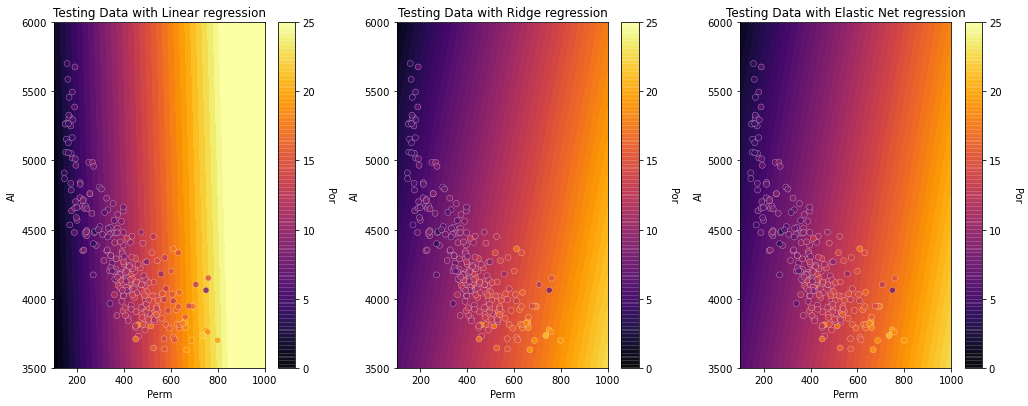

<Figure size 432x288 with 0 Axes>

In [116]:
#Linear model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train.values, y_train.values)
plt.subplot(131)   
plt = visualize_model(linear_reg,X_test["Perm"],Perm_min,Perm_max,X_test["AI"],AI_min,AI_max, y_test["Por"],Por_min,Por_max,'Testing Data with Linear regression')
#Ridge regression
lam = 17752                                         
ridge_reg = Ridge(alpha=lam)
ridge_reg.fit(X_train,y_train)
plt.subplot(132)   
plt = visualize_model(ridge_reg,X_test["Perm"],Perm_min,Perm_max,X_test["AI"],AI_min,AI_max, y_test["Por"],Por_min,Por_max,'Testing Data with Ridge regression')
#Elastic net regression
elasticnet_reg = linear_model.ElasticNet(alpha=47.1486636,l1_ratio=0.82094)
elasticnet_reg.fit(X_train.values, y_train.values) # fit model
plt.subplot(133)                                     
plt = visualize_model(elasticnet_reg,X_test["Perm"],Perm_min,Perm_max,X_test["AI"],AI_min,AI_max, y_test["Por"],Por_min,Por_max,'Testing Data with Elastic Net regression')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)

#### For the linear regression model the error was much larger the summary of data statistics is the following:

* Testing: MSE = 5.11
* Testing: Average error = -0.07
* Testing: Standard Deviation error = 2.28
* Testing: Variance explained = 0.61

#### For the ridge regression model the error was smaller than linear regression with hyperparameter lamda= 17752 the summary of data statistics is the following:

* Testing: MSE  = 2.9819413
* Testing: Variance explained = 0.7773985
* Testing: Average error = -0.5403563
* Testing: Standard Deviation error = 1.6401087

#### For the elastic net regression model the error was much smaller, the summary of data statistics is the following:

* Testing: Average error = -0.07
* Testing: Standard Deviation error = 5.99
* Testing: Maximum Variance explained with tuned hyperparameters = 0.7787862
* Testing: Minimum MSE with tuned hyperparameters = 2.9633516

* The average error was lowest for Elastic net method (-0.07) altough the standard deviation was higher (6) than other models. Maximum variance was explained by elastic net method (0.7787862) with lowest MSE (2.963). Hence, Elastic net is a better method for the current case.

References:

[1] Zou, Hui; Hastie, Trevor (2005). "Regularization and Variable Selection via the Elastic Net". Journal of the Royal Statistical Society, Series B. 67 (Part 2),pp: 301–320. CiteSeerX 10.1.1.124.4696

[2] Wikipedia contributors. (2020, September 12). Elastic net regularization. Retrieved from https://en.wikipedia.org/wiki/Elastic_net_regularization 

[3] 1.1. Linear Models — scikit-learn 0.23.2 documentation. (n.d.). Retrieved from https://scikit-learn.org/stable/modules/linear_model.html#elastic-net 

[4] Michael Pyrcz (2020, October 27). PythonNumericalDemos/PythonDataBasics_MachineLearning.ipynb. Github. Retrieved from: https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_MachineLearning.ipynb


I hope this was helpful,

Muneeb Akmal. Graduate student

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin